# Airline Passenger Satisfaction

Import All the Libraries.

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
import missingno as missi

warnings.filterwarnings("ignore")
plt.style.use("ggplot")

sns.set()

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

## Data Collection and Processing.

In [176]:
dataset = pd.read_csv("dataset.csv")
# dataset = pd.read_excel("first.xlsx")

In [177]:
#  Show the top 5 Values.
dataset.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3.0,4.0,...,5.0,4.0,3.0,4.0,4,5.0,5.0,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235.0,3.0,2.0,...,1.0,1.0,5.0,3.0,1,4.0,1.0,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4,4.0,5.0,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562.0,2.0,5.0,...,2.0,2.0,5.0,3.0,1,4.0,2.0,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3,3.0,3.0,0,0.0,satisfied


In [178]:
#  Show the last 5 rows.
dataset.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192.0,2.0,1.0,...,2.0,3.0,1.0,4.0,2,3.0,2.0,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347.0,4.0,4.0,...,5.0,5.0,5.0,5.0,5,5.0,4.0,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995.0,1.0,1.0,...,4.0,3.0,2.0,4.0,5,5.0,4.0,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000.0,1.0,1.0,...,1.0,4.0,5.0,1.0,5,4.0,1.0,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723.0,1.0,3.0,...,1.0,1.0,1.0,4.0,4,3.0,1.0,0,0.0,neutral or dissatisfied


In [179]:
dataset.shape

#  There are the 1L+ rows and the 25 columns in this dataset.

(103904, 25)

## EDA (Exploratory Data Analysis)

### Analysis Part 1

In [180]:
dataset.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3.0,4.0,...,5.0,4.0,3.0,4.0,4,5.0,5.0,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235.0,3.0,2.0,...,1.0,1.0,5.0,3.0,1,4.0,1.0,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4,4.0,5.0,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562.0,2.0,5.0,...,2.0,2.0,5.0,3.0,1,4.0,2.0,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3,3.0,3.0,0,0.0,satisfied


In [181]:
#  Check the columns for the dataset.
print(dataset.columns)
print(len(dataset.columns))

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')
25


In [182]:
dataset.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3.0,4.0,...,5.0,4.0,3.0,4.0,4,5.0,5.0,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235.0,3.0,2.0,...,1.0,1.0,5.0,3.0,1,4.0,1.0,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4,4.0,5.0,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562.0,2.0,5.0,...,2.0,2.0,5.0,3.0,1,4.0,2.0,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3,3.0,3.0,0,0.0,satisfied


In [183]:
dataset.info()

#  Here we checked all the columns that contain the correct data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103897 non-null  object 
 3   Customer Type                      103901 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103899 non-null  object 
 6   Class                              103901 non-null  object 
 7   Flight Distance                    103903 non-null  float64
 8   Inflight wifi service              103903 non-null  float64
 9   Departure/Arrival time convenient  103903 non-null  float64
 10  Ease of Online booking             103902 non-null  float64
 11  Gate location                      1038

In [184]:
dataset.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103903.000000,103903.000000,103903.000000,103902.000000,103898.000000,103902.000000,103897.000000,103904.000000,103902.000000,103903.000000,103900.000000,103898.000000,103904.000000,103900.000000,103903.000000,103904.000000,103592.000000
mean,51951.500000,64924.210502,39.379706,1189.441999,2.729709,3.060297,2.756906,2.976920,3.202114,3.250402,3.439396,3.358164,3.382347,3.351068,3.631850,3.304290,3.640443,3.286334,14.815618,15.178933
std,29994.645522,37463.812252,15.114964,997.149961,1.327809,1.525083,1.398927,1.277621,1.329534,1.349490,1.319088,1.332974,1.288351,1.315592,1.180881,1.265396,1.175656,1.312268,38.230901,38.699011
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [185]:
#  Check the data duplicacy into the dataset.
dataset.duplicated().sum()

0

In [186]:
dataset.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3.0,4.0,...,5.0,4.0,3.0,4.0,4,5.0,5.0,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235.0,3.0,2.0,...,1.0,1.0,5.0,3.0,1,4.0,1.0,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4,4.0,5.0,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562.0,2.0,5.0,...,2.0,2.0,5.0,3.0,1,4.0,2.0,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3,3.0,3.0,0,0.0,satisfied


In [187]:
## Do some Feature Engineering before moving Forward.
# we have the remove unnecessary columns from the dataset.
dataset.drop(columns=["Unnamed: 0", "id"], axis=1, inplace=True)

In [188]:
dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3.0,4.0,3.0,1.0,...,5.0,4.0,3.0,4.0,4,5.0,5.0,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235.0,3.0,2.0,3.0,3.0,...,1.0,1.0,5.0,3.0,1,4.0,1.0,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142.0,2.0,2.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4,4.0,5.0,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562.0,2.0,5.0,5.0,5.0,...,2.0,2.0,5.0,3.0,1,4.0,2.0,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214.0,3.0,3.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3,3.0,3.0,0,0.0,satisfied


In [189]:
# Here we divide the numerical column and the categorical column.
categorical_col = dataset.select_dtypes(include="object").columns.to_list()
numerical_col = [i for i in dataset.columns if i not in categorical_col]
print(categorical_col)
print(len(categorical_col))
print(numerical_col)
print(len(numerical_col))

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
5
['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
18


In [190]:
#  FInd the Unique Values in the Categorical Columns.
for i in categorical_col:
    print(i, dataset[i].unique())
    print("-" * 70)              

Gender ['Male' 'Female' nan]
----------------------------------------------------------------------
Customer Type ['Loyal Customer' 'disloyal Customer' nan]
----------------------------------------------------------------------
Type of Travel ['Personal Travel' 'Business travel' nan]
----------------------------------------------------------------------
Class ['Eco Plus' 'Business' 'Eco' nan]
----------------------------------------------------------------------
satisfaction ['neutral or dissatisfied' 'satisfied']
----------------------------------------------------------------------


In [191]:
dataset[dataset["satisfaction"] == "neutral or dissatisfied"]
len(dataset[dataset["satisfaction"] == "neutral or dissatisfied"])

58879

In [192]:
#  In this dataset we dont have any kind of the Data Imbalancing.
dataset.satisfaction.value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [193]:
#  For PLotting the graph we need to separate the columns into the proper numerical or the multiclass value.
plot_numerical_col= ["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
plot_categorical_col = [i for i in dataset.columns if i not in plot_numerical_col]

In [194]:
print(plot_numerical_col)
print(plot_categorical_col)

['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']


In [195]:
#  Check the Missing Value into the dataset.
dataset.isnull().sum()

Gender                                 7
Customer Type                          3
Age                                    0
Type of Travel                         5
Class                                  3
Flight Distance                        1
Inflight wifi service                  1
Departure/Arrival time convenient      1
Ease of Online booking                 2
Gate location                          6
Food and drink                         2
Online boarding                        7
Seat comfort                           0
Inflight entertainment                 2
On-board service                       1
Leg room service                       4
Baggage handling                       6
Checkin service                        0
Inflight service                       4
Cleanliness                            1
Departure Delay in Minutes             0
Arrival Delay in Minutes             312
satisfaction                           0
dtype: int64

In [196]:
print(312 * 100 / dataset.shape[0])

#  we have only maximum 0.3% of missing data in a particular feature. we have 2 option either we drop the missing data or fill with the mean, mode and the median Value.

0.300277178934401


## Analysis Part 2 (Categorical Analysis)

In [197]:
plot_categorical_col

['Gender',
 'Customer Type',
 'Type of Travel',
 'Class',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'satisfaction']

In [198]:
# # # #  Analysis for the Categorical Features.
# plt.figure(figsize=(8, 20))
# for i,val in enumerate(plot_categorical_col):
#     plt.subplot(10,2, i + 1)
#     sns.barplot(dataset[val])
#     plt.title(f"Count plot for the {val}")
#     plt.xlabel(f"{val}")
#     plt.ylabel("Count Values")
#     break
# plt.tight_layout()
# plt.show()

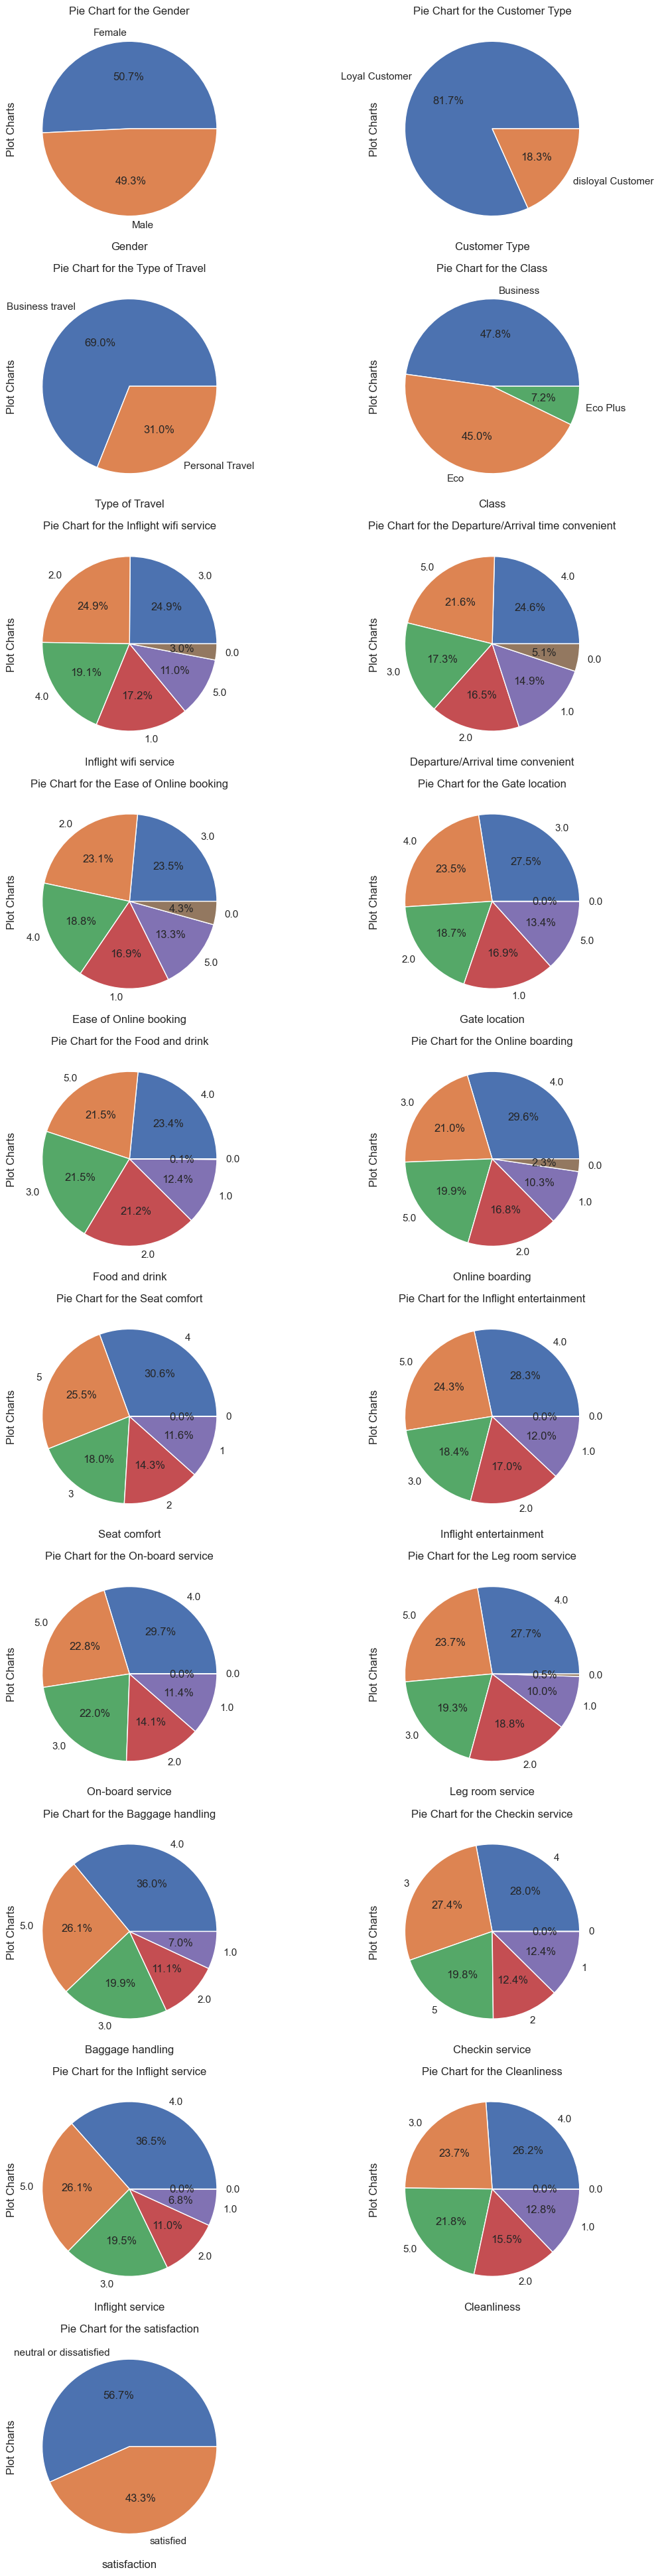

In [199]:
# # #  Analysis for the Categorical Features.
plt.figure(figsize=(12, 39))
for i,val in enumerate(plot_categorical_col):
    plt.subplot(10,2, i + 1)
    dataset[val].value_counts().plot.pie(autopct = "%.1f%%")
    plt.title(f"Pie Chart for the {val}")
    plt.xlabel(f"{val}")
    plt.ylabel("Plot Charts")
plt.tight_layout()
plt.show()

#  Here we plot the pie chart for the Categorical features for the datast.

In [200]:
dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3.0,4.0,3.0,1.0,...,5.0,4.0,3.0,4.0,4,5.0,5.0,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235.0,3.0,2.0,3.0,3.0,...,1.0,1.0,5.0,3.0,1,4.0,1.0,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142.0,2.0,2.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4,4.0,5.0,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562.0,2.0,5.0,5.0,5.0,...,2.0,2.0,5.0,3.0,1,4.0,2.0,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214.0,3.0,3.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3,3.0,3.0,0,0.0,satisfied


## Analysis Part 3 (Numerical Columns)

In [201]:
plot_numerical_col

['Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

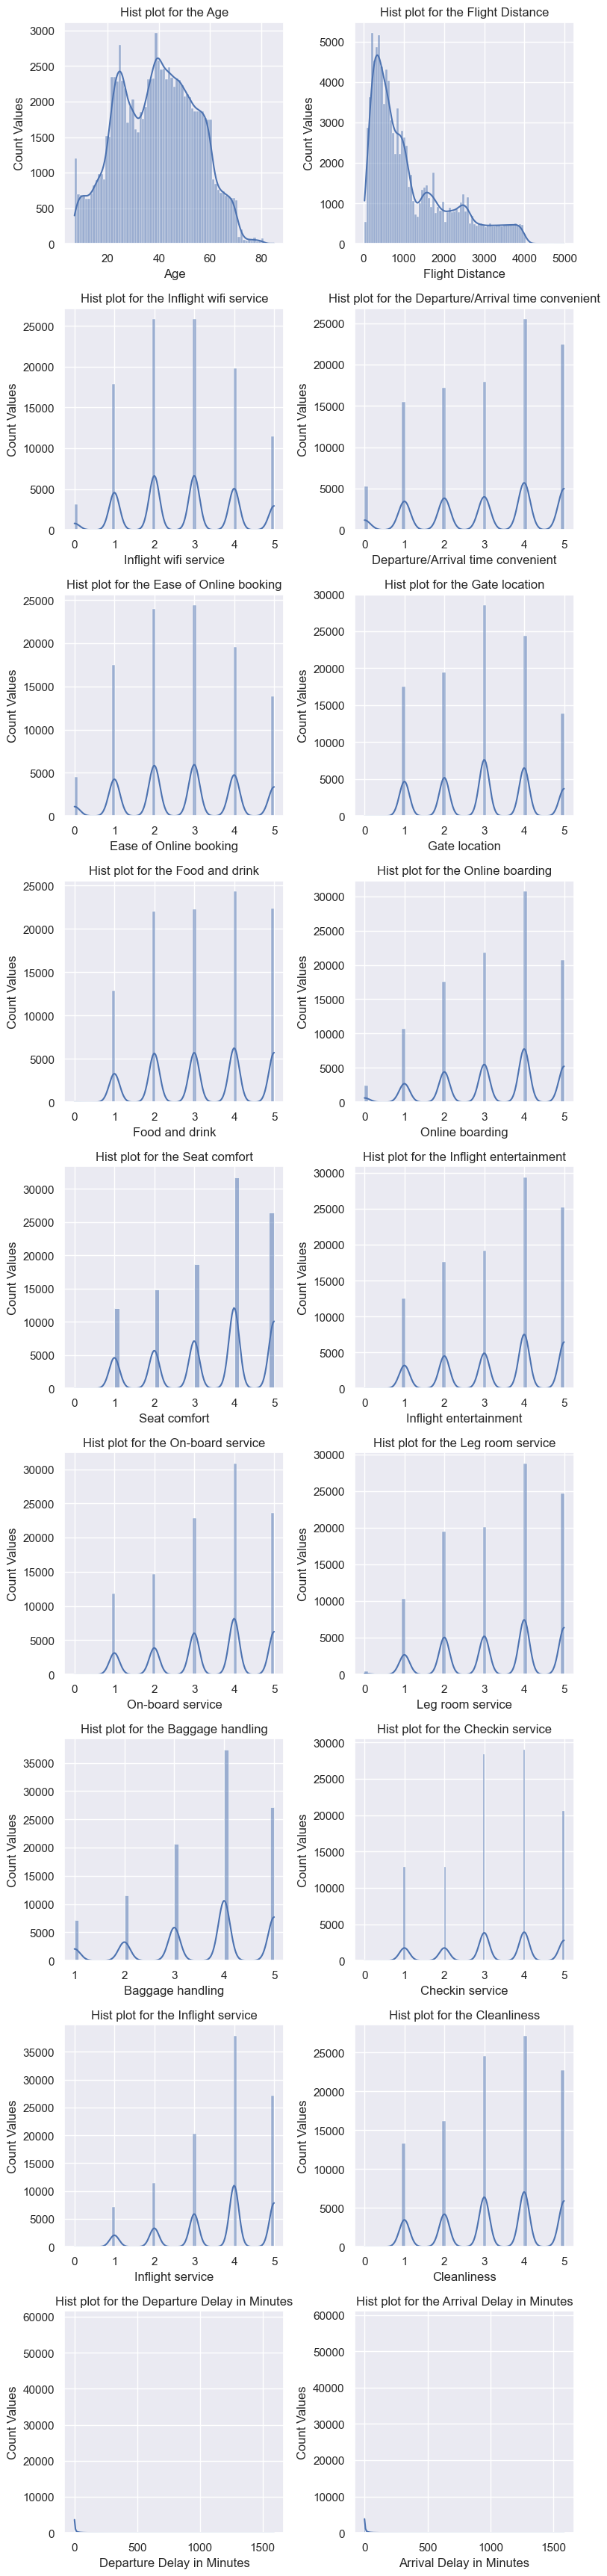

In [202]:
#  PLot the histplot for the numerical feature.
#  Analysis for the numerical Features.
plt.figure(figsize=(8, 38))
for i,val in enumerate(numerical_col):
    plt.subplot(10,2, i + 1)
    sns.histplot(dataset[val], kde=True)
    plt.title(f"Hist plot for the {val}")
    plt.xlabel(f"{val}")
    plt.ylabel("Count Values")

plt.tight_layout()
plt.show()

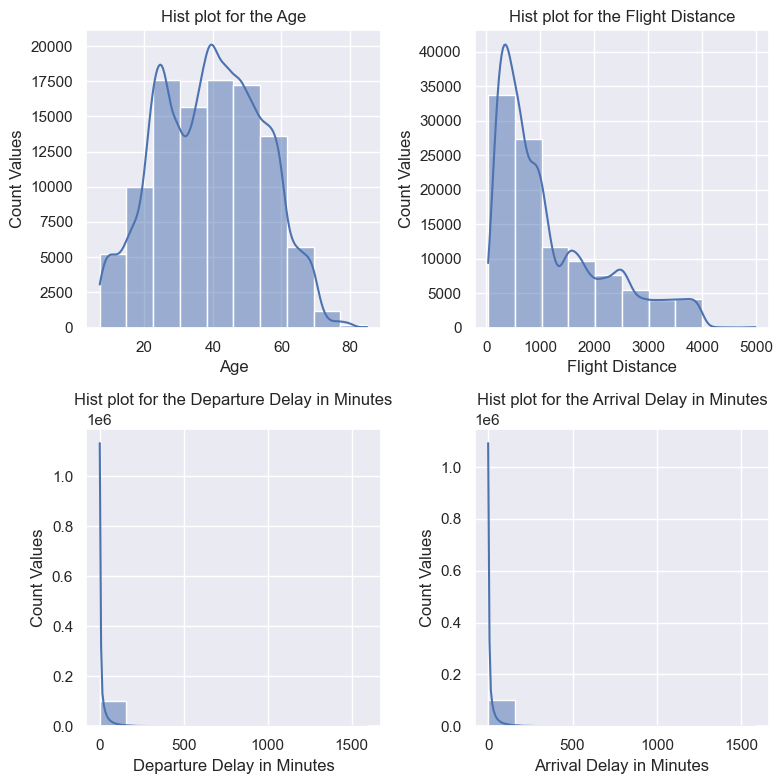

In [203]:
#  PLot the histplot for the numerical feature.
#  Analysis for the numerical Features.
plt.figure(figsize=(8,8))
for i,val in enumerate(plot_numerical_col):
    plt.subplot(2,2, i + 1)
    sns.histplot(dataset[val], kde=True,bins=10)
    plt.title(f"Hist plot for the {val}")
    plt.xlabel(f"{val}")
    plt.ylabel("Count Values")

plt.tight_layout()
plt.show()

In [204]:
plot_numerical_col

['Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

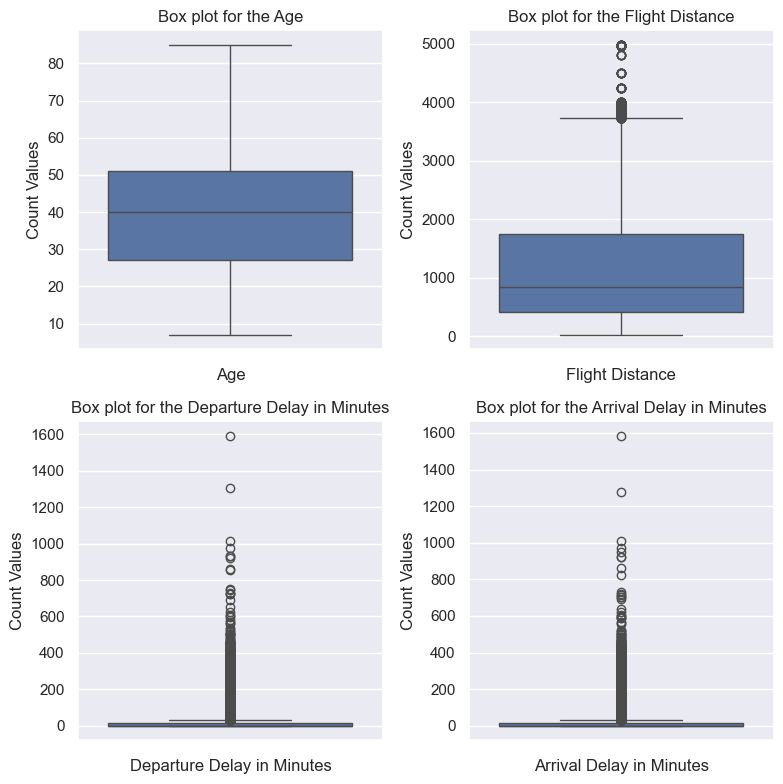

In [205]:
#  Create the BoxPlot for detecting the Outliers into the features.

#  Analysis for the numerical Features.
plt.figure(figsize=(8, 8))
for i,val in enumerate(plot_numerical_col):
    plt.subplot(2,2, i + 1)
    sns.boxplot(dataset[val])
    plt.title(f"Box plot for the {val}")
    plt.xlabel(f"{val}")
    plt.ylabel("Count Values")

plt.tight_layout()
plt.show()

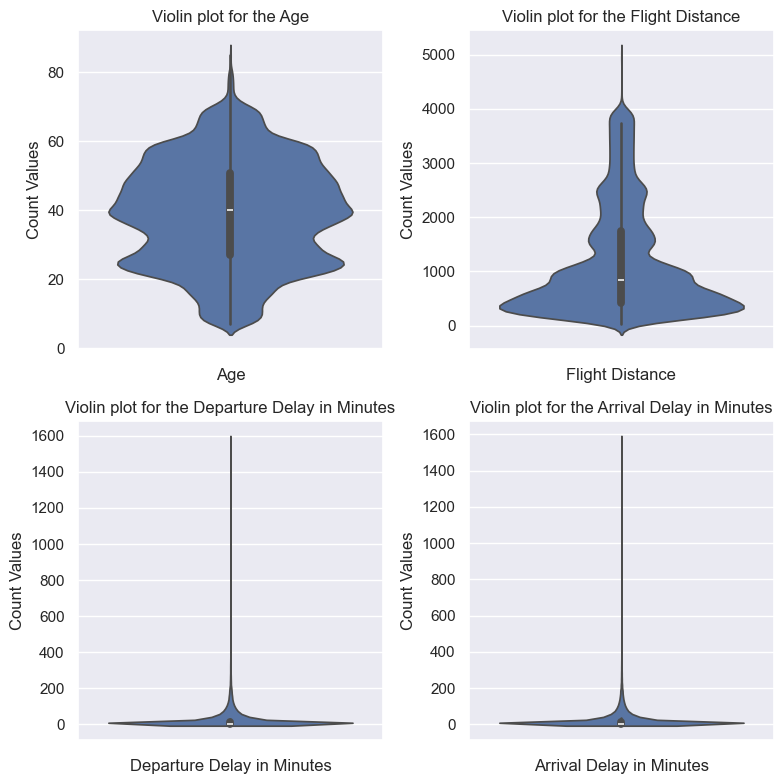

In [206]:
#  Create the BoxPlot for detecting the Outliers into the features.

#  Analysis for the numerical Features.
plt.figure(figsize=(8, 8))
for i,val in enumerate(plot_numerical_col):
    plt.subplot(2,2, i + 1)
    sns.violinplot(dataset[val])
    plt.title(f"Violin plot for the {val}")
    plt.xlabel(f"{val}")
    plt.ylabel("Count Values")

plt.tight_layout()
plt.show()

In [207]:
print(dataset["Departure Delay in Minutes"].max())
print(dataset["Departure Delay in Minutes"].min())

1592
0


In [208]:
print(dataset["Arrival Delay in Minutes"].max())
print(dataset["Arrival Delay in Minutes"].min())

1584.0
0.0


In [209]:
dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3.0,4.0,3.0,1.0,...,5.0,4.0,3.0,4.0,4,5.0,5.0,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235.0,3.0,2.0,3.0,3.0,...,1.0,1.0,5.0,3.0,1,4.0,1.0,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142.0,2.0,2.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4,4.0,5.0,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562.0,2.0,5.0,5.0,5.0,...,2.0,2.0,5.0,3.0,1,4.0,2.0,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214.0,3.0,3.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3,3.0,3.0,0,0.0,satisfied


In [210]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103897 non-null  object 
 1   Customer Type                      103901 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103899 non-null  object 
 4   Class                              103901 non-null  object 
 5   Flight Distance                    103903 non-null  float64
 6   Inflight wifi service              103903 non-null  float64
 7   Departure/Arrival time convenient  103903 non-null  float64
 8   Ease of Online booking             103902 non-null  float64
 9   Gate location                      103898 non-null  float64
 10  Food and drink                     103902 non-null  float64
 11  Online boarding                    1038

In [211]:
dataset.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

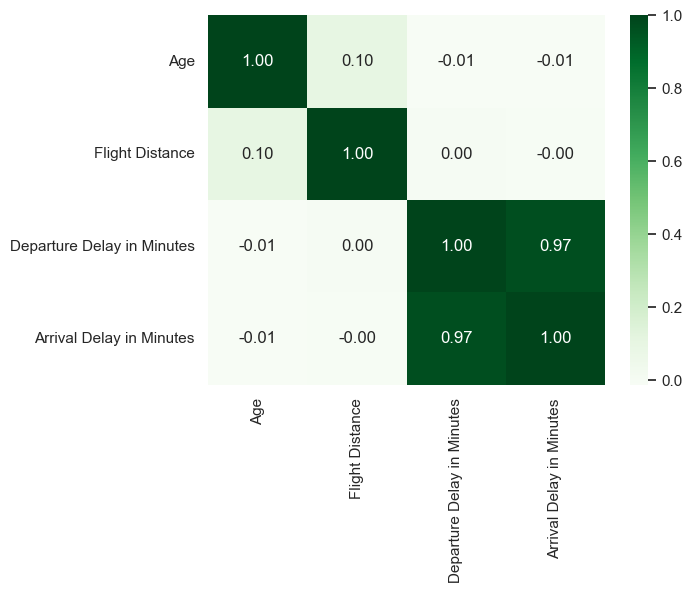

In [212]:
# Plot the Heatmap for the Numerical Columns.
sns.heatmap(dataset[plot_numerical_col].corr(), cmap = "Greens", fmt=".2f", annot=True, annot_kws={"size": 12})
plt.show()

## Data Preprocessing

In [213]:
# Fill the misssing Value into the dataset.
dataset.isnull().sum()

Gender                                 7
Customer Type                          3
Age                                    0
Type of Travel                         5
Class                                  3
Flight Distance                        1
Inflight wifi service                  1
Departure/Arrival time convenient      1
Ease of Online booking                 2
Gate location                          6
Food and drink                         2
Online boarding                        7
Seat comfort                           0
Inflight entertainment                 2
On-board service                       1
Leg room service                       4
Baggage handling                       6
Checkin service                        0
Inflight service                       4
Cleanliness                            1
Departure Delay in Minutes             0
Arrival Delay in Minutes             312
satisfaction                           0
dtype: int64

In [214]:
numerical_col

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [215]:
categorical_col

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

In [216]:
#  Create the function for filling the missing Value.
def mean_filling(feature):
    dataset.fillna({feature: dataset[feature].mean()}, inplace=True)

In [217]:
#  Fill the mean into the numerical columns.
for i in numerical_col:
    mean_filling(i)

In [218]:
dataset.isnull().sum()

Gender                               7
Customer Type                        3
Age                                  0
Type of Travel                       5
Class                                3
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [219]:
#  Create the function for filling the missing value for the categorical Feature.
#  Create the function for filling the missing Value.
def mode_filling(feature):
    dataset.fillna({feature: dataset[feature].mode()[0]}, inplace=True)

In [220]:
#  Fill the mean into the numerical columns.
for i in categorical_col:
    mode_filling(i)

In [221]:
# dataset.isnull().sum()

In [222]:
#  Till here we dont have any kind of the missing Value.

In [223]:
# dataset.to_csv("cleaned_data.csv")

## Feature Engineering

In [224]:
dataset["Total Delay"] = dataset["Departure Delay in Minutes"] + dataset["Arrival Delay in Minutes"]
dataset["Delay Ratio"] = dataset["Arrival Delay in Minutes"] + dataset["Flight Distance"]
dataset["Comfort Score"] = ((dataset["Seat comfort"] + dataset["Leg room service"] + dataset["Inflight entertainment"] ) / 3).astype(int)

#  Drop all the necesaary columns from the dataset.
dataset.drop(columns=["Departure Delay in Minutes", "Arrival Delay in Minutes", "Flight Distance", "Seat comfort", "Leg room service", "Inflight entertainment"], axis=1, inplace=True)

In [225]:
dataset["Comfort Score"] = dataset["Comfort Score"].astype(int)

In [226]:
dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Total Delay,Delay Ratio,Comfort Score
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,3.0,4.0,3.0,1.0,5.0,3.0,4.0,4.0,4,5.0,5.0,neutral or dissatisfied,43.0,478.0,4
1,Male,disloyal Customer,25,Business travel,Business,3.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,1,4.0,1.0,neutral or dissatisfied,7.0,241.0,2
2,Female,Loyal Customer,26,Business travel,Business,2.0,2.0,2.0,2.0,5.0,5.0,4.0,4.0,4,4.0,5.0,satisfied,0.0,1142.0,4
3,Female,Loyal Customer,25,Business travel,Business,2.0,5.0,5.0,5.0,2.0,2.0,2.0,3.0,1,4.0,2.0,neutral or dissatisfied,20.0,571.0,3
4,Male,Loyal Customer,61,Business travel,Business,3.0,3.0,3.0,3.0,4.0,5.0,3.0,4.0,3,3.0,3.0,satisfied,0.0,214.0,4


In [227]:
dataset.satisfaction.value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [228]:
for i in categorical_col:
    print(i, dataset[i].unique())
    print("-" * 70)

Gender ['Male' 'Female']
----------------------------------------------------------------------
Customer Type ['Loyal Customer' 'disloyal Customer']
----------------------------------------------------------------------
Type of Travel ['Personal Travel' 'Business travel']
----------------------------------------------------------------------
Class ['Eco Plus' 'Business' 'Eco']
----------------------------------------------------------------------
satisfaction ['neutral or dissatisfied' 'satisfied']
----------------------------------------------------------------------


## Label Encoding.

In [229]:
#  here we need to perform the label encoding.

encoder = LabelEncoder()

for i in categorical_col:
    dataset[i] = encoder.fit_transform(dataset[i])

#  we need to save the Label Encoder for the Future Prediction.
with open("label_encoder.pkl", "wb") as enc:
    pickle.dump(encoder, enc)

In [230]:
dataset.head()

,Gender,Customer Type,Age,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,On-board service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Total Delay,Delay Ratio,Comfort Score
0,1,0,13,1,2,3.0,4.0,3.0,1.0,5.0,3.0,4.0,4.0,4,5.0,5.0,0,43.0,478.0,4
1,1,1,25,0,0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,1,4.0,1.0,0,7.0,241.0,2
2,0,0,26,0,0,2.0,2.0,2.0,2.0,5.0,5.0,4.0,4.0,4,4.0,5.0,1,0.0,1142.0,4
3,0,0,25,0,0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,3.0,1,4.0,2.0,0,20.0,571.0,3
4,1,0,61,0,0,3.0,3.0,3.0,3.0,4.0,5.0,3.0,4.0,3,3.0,3.0,1,0.0,214.0,4


In [231]:
#  Divide the data into the dependent and the Independent Variable.

In [232]:
x = dataset.drop("satisfaction", axis=1)
y = dataset["satisfaction"]

In [233]:
#  Split the dataset into the training and the testing data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [234]:
print(x.shape, x_train.shape, x_test.shape)

(103904, 19) (83123, 19) (20781, 19)


In [235]:
#  Perform the Feature Scaling on the all numerical features.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
#  Perform the feature scaling for the training and the testing data.

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [236]:
x_train

array([[0.        , 0.        , 0.66666667, ..., 0.00472292, 0.20478777,
        0.6       ],
       [0.        , 1.        , 0.42307692, ..., 0.01511335, 0.15087508,
        0.4       ],
       [1.        , 0.        , 0.74358974, ..., 0.        , 0.0708107 ,
        0.4       ],
       ...,
       [1.        , 0.        , 0.5       , ..., 0.16467254, 0.28746731,
        0.4       ],
       [0.        , 0.        , 0.38461538, ..., 0.        , 0.0581372 ,
        0.8       ],
       [0.        , 0.        , 0.08974359, ..., 0.        , 0.06437337,
        0.8       ]])

In [237]:
dataset.duplicated().sum()

0

In [326]:
#  Save the MinMaxScaler for the Future Scaling.
import pickle

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

## Model Implementation and Evaluation.

### Logistic Regresssion Model

In [279]:
model1 = LogisticRegression()

model1.fit(x_train, y_train)

LogisticRegression()

The training accuracy are:-  0.8737653838287839
The testing accuracy are:-  0.8761849766613734
The confusion matrix are:-  [[10604  1464]
 [ 1109  7604]]
The Classification report are:-                precision    recall  f1-score   support

           0       0.91      0.88      0.89     12068
           1       0.84      0.87      0.86      8713

    accuracy                           0.88     20781
   macro avg       0.87      0.88      0.87     20781
weighted avg       0.88      0.88      0.88     20781



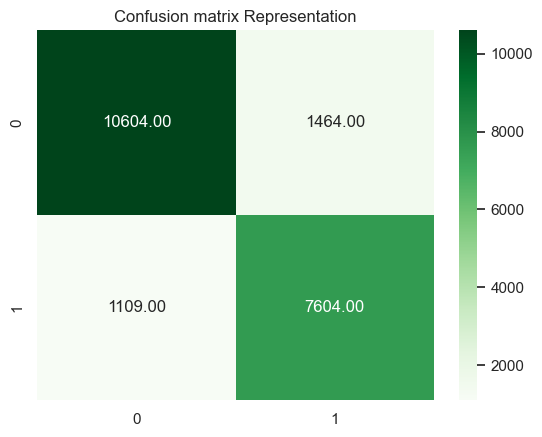

In [280]:
#  Finding the accuracy for the Model.
print("The training accuracy are:- ", accuracy_score(model1.predict(x_train), y_train))
model1_acc = accuracy_score(model1.predict(x_test), y_test)
print("The testing accuracy are:- ", accuracy_score(model1.predict(x_test), y_test))
print("The confusion matrix are:- ", confusion_matrix(model1.predict(x_test), y_test))
print("The Classification report are:- ", classification_report(model1.predict(x_test), y_test))

#  Plot for the confusion matrix.
sns.heatmap(confusion_matrix(model1.predict(x_test), y_test), annot=True, annot_kws={"size": 12}, cmap = "Greens", fmt=".2f", )
plt.title("Confusion matrix Representation")
plt.show()

### KNearest Neighbour Model

In [285]:
model2 = KNeighborsClassifier()

In [286]:
model2.fit(x_test, y_test)

KNeighborsClassifier()

The training accuracy are:-  0.9210086257714472
The testing accuracy are:-  0.9412925268273904
The confusion matrix are:-  [[11367   874]
 [  346  8194]]
The Classification report are:-                precision    recall  f1-score   support

           0       0.97      0.93      0.95     12241
           1       0.90      0.96      0.93      8540

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



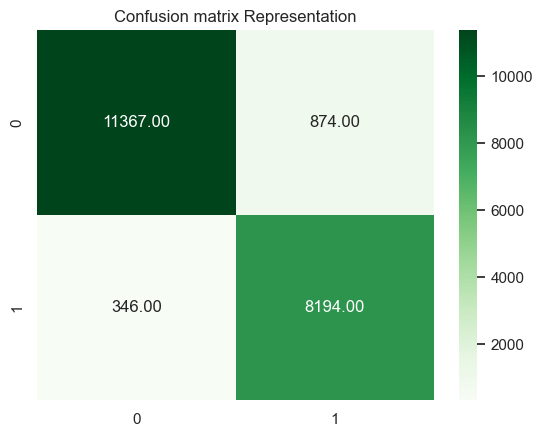

In [289]:
#  Finding the accuracy for the Model.
print("The training accuracy are:- ", accuracy_score(model2.predict(x_train), y_train))
model2_acc = accuracy_score(model2.predict(x_test), y_test)
print("The testing accuracy are:- ", accuracy_score(model2.predict(x_test), y_test))
print("The confusion matrix are:- ", confusion_matrix(model2.predict(x_test), y_test))
print("The Classification report are:- ", classification_report(model2.predict(x_test), y_test))

#  Plot for the confusion matrix.
sns.heatmap(confusion_matrix(model2.predict(x_test), y_test), annot=True, annot_kws={"size": 12}, cmap = "Greens", fmt=".2f", )
plt.title("Confusion matrix Representation")
plt.show()

### Support Vector Classifier

In [290]:
model3 = SVC()

model3.fit(x_test, y_test)

SVC()

The training accuracy are:-  0.9403775128424142
The testing accuracy are:-  0.9454790433569126
The confusion matrix are:-  [[11270   690]
 [  443  8378]]
The Classification report are:-                precision    recall  f1-score   support

           0       0.96      0.94      0.95     11960
           1       0.92      0.95      0.94      8821

    accuracy                           0.95     20781
   macro avg       0.94      0.95      0.94     20781
weighted avg       0.95      0.95      0.95     20781



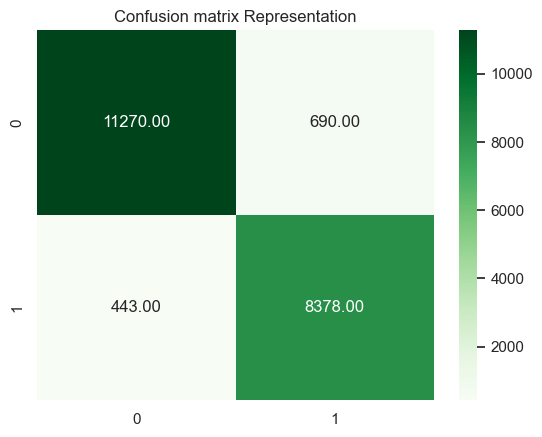

In [291]:
#  Finding the accuracy for the Model.
print("The training accuracy are:- ", accuracy_score(model3.predict(x_train), y_train))
model3_acc = accuracy_score(model3.predict(x_test), y_test)
print("The testing accuracy are:- ", accuracy_score(model3.predict(x_test), y_test))
print("The confusion matrix are:- ", confusion_matrix(model3.predict(x_test), y_test))
print("The Classification report are:- ", classification_report(model3.predict(x_test), y_test))

#  Plot for the confusion matrix.
sns.heatmap(confusion_matrix(model3.predict(x_test), y_test), annot=True, annot_kws={"size": 12}, cmap = "Greens", fmt=".2f", )
plt.title("Confusion matrix Representation")
plt.show()

### Decision Tree Classifier.

In [297]:
model4 = DecisionTreeClassifier()

#  for this type of the model we need to perform the hyperparameter tuning.
parameters = {
    "criterion": ['gini', 'entropy'],
    "splitter": ['best','random'],
    "max_depth": [3,4,5],
    "min_samples_split":[1,2,3],
    "min_samples_leaf": [1,2,3],
}

# Write the code for the hyper parameter tuning.
random_search = RandomizedSearchCV(model4, parameters, cv=5, n_jobs=-1)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [1, 2, 3],
                                        'splitter': ['best', 'random']})

In [299]:
random_search.best_params_

{'splitter': 'best',
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_depth': 5,
 'criterion': 'entropy'}

In [300]:
random_search.best_score_

0.8943133587095746

In [301]:
model4 = DecisionTreeClassifier(splitter="best", min_samples_split=3, min_samples_leaf=3, max_depth=5, criterion="entropy")

#  Fit the model with the suggested best parameters.
model4.fit(x_test, y_test)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=3)

The training accuracy are:-  0.9010021293745414
The testing accuracy are:-  0.9024589769500987
The confusion matrix are:-  [[11018  1332]
 [  695  7736]]
The Classification report are:-                precision    recall  f1-score   support

           0       0.94      0.89      0.92     12350
           1       0.85      0.92      0.88      8431

    accuracy                           0.90     20781
   macro avg       0.90      0.90      0.90     20781
weighted avg       0.91      0.90      0.90     20781



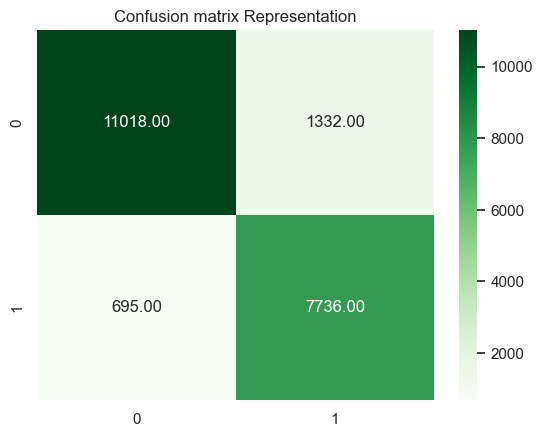

In [302]:
#  Finding the accuracy for the Model.
print("The training accuracy are:- ", accuracy_score(model4.predict(x_train), y_train))
model4_acc = accuracy_score(model4.predict(x_test), y_test)
print("The testing accuracy are:- ", accuracy_score(model4.predict(x_test), y_test))
print("The confusion matrix are:- ", confusion_matrix(model4.predict(x_test), y_test))
print("The Classification report are:- ", classification_report(model4.predict(x_test), y_test))

#  Plot for the confusion matrix.
sns.heatmap(confusion_matrix(model4.predict(x_test), y_test), annot=True, annot_kws={"size": 12}, cmap = "Greens", fmt=".2f", )
plt.title("Confusion matrix Representation")
plt.show()

### Random Forest Classifier.

In [303]:
model5 = RandomForestClassifier()

parameters = {
    "n_estimators": [150,200],
    "criterion": ['gini', 'entropy'],
    "max_depth": [3,4,5],
    "min_samples_split": [1,2,3],
    "min_samples_leaf": [1,2,3]
}

random_search = RandomizedSearchCV(model5, parameters, cv = 5, n_jobs=-1)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [1, 2, 3],
                                        'n_estimators': [150, 200]})

In [304]:
random_search.best_params_

{'n_estimators': 150,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': 5,
 'criterion': 'gini'}

In [ ]:
random_search.best_score_

In [307]:
#  Now Fit the Model with the new Optimised Parameters.
model5 = RandomForestClassifier(n_estimators=150, min_samples_split=2, min_samples_leaf=1, max_depth=5, criterion="gini")
model5.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=150)

The training accuracy are:-  0.9200582269648593
The testing accuracy are:-  0.9204080650594293
The confusion matrix are:-  [[11073  1014]
 [  640  8054]]
The Classification report are:-                precision    recall  f1-score   support

           0       0.95      0.92      0.93     12087
           1       0.89      0.93      0.91      8694

    accuracy                           0.92     20781
   macro avg       0.92      0.92      0.92     20781
weighted avg       0.92      0.92      0.92     20781



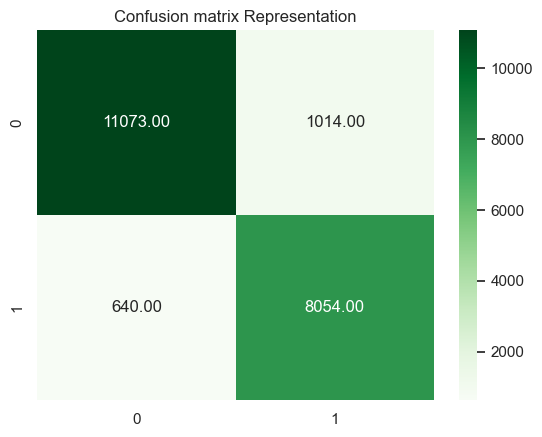

In [308]:
#  Finding the accuracy for the Model.
print("The training accuracy are:- ", accuracy_score(model5.predict(x_train), y_train))
model5_acc = accuracy_score(model5.predict(x_test), y_test)
print("The testing accuracy are:- ", accuracy_score(model5.predict(x_test), y_test))
print("The confusion matrix are:- ", confusion_matrix(model5.predict(x_test), y_test))
print("The Classification report are:- ", classification_report(model5.predict(x_test), y_test))

#  Plot for the confusion matrix.
sns.heatmap(confusion_matrix(model5.predict(x_test), y_test), annot=True, annot_kws={"size": 12}, cmap = "Greens", fmt=".2f", )
plt.title("Confusion matrix Representation")
plt.show()

In [312]:
### Gradient Boost Algorithm.
model6 = GradientBoostingClassifier()

parameters = {
    "loss": ['log_loss','exponential'] ,
    "learning_rate": [0.001,0.01,0.1],
    "n_estimators":[100, 150],
    "criterion" : ['friedman_mse','squared_error'],
    "min_samples_split" : [1,2,3],
    "min_samples_leaf": [1,2,3]
}

In [314]:
#  Code for the Random Search CV
random_search = RandomizedSearchCV(model6, parameters, cv=5, n_jobs=-1)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': [0.001, 0.01, 0.1],
                                        'loss': ['log_loss', 'exponential'],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [1, 2, 3],
                                        'n_estimators': [100, 150]})

In [315]:
#  Finding the best parameters.
random_search.best_params_

{'n_estimators': 150,
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'loss': 'log_loss',
 'learning_rate': 0.1,
 'criterion': 'friedman_mse'}

In [316]:
# Finding the best cross Validation Score.
random_search.best_score_

0.946765673326724

In [317]:
#  Again declare the model and run with the optimised or hyperparameterized Parameters.
model6 = GradientBoostingClassifier(n_estimators=150, min_samples_split=3, min_samples_leaf=2, loss="log_loss", learning_rate=0.1, criterion="friedman_mse")
model6.fit(x_train, y_train)

GradientBoostingClassifier(min_samples_leaf=2, min_samples_split=3,
                           n_estimators=150)

The training accuracy are:-  0.9474513672509414
The testing accuracy are:-  0.9472595159039507
The confusion matrix are:-  [[11312   695]
 [  401  8373]]
The Classification report are:-                precision    recall  f1-score   support

           0       0.97      0.94      0.95     12007
           1       0.92      0.95      0.94      8774

    accuracy                           0.95     20781
   macro avg       0.94      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



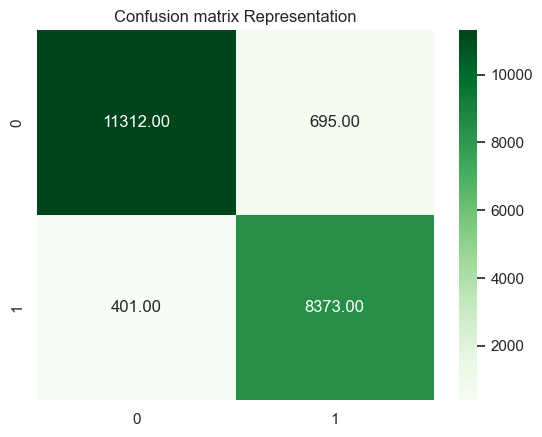

In [318]:
#  Finding the accuracy for the Model.
print("The training accuracy are:- ", accuracy_score(model6.predict(x_train), y_train))
model6_acc = accuracy_score(model6.predict(x_test), y_test)
print("The testing accuracy are:- ", accuracy_score(model6.predict(x_test), y_test))
print("The confusion matrix are:- ", confusion_matrix(model6.predict(x_test), y_test))
print("The Classification report are:- ", classification_report(model6.predict(x_test), y_test))

#  Plot for the confusion matrix.
sns.heatmap(confusion_matrix(model6.predict(x_test), y_test), annot=True, annot_kws={"size": 12}, cmap = "Greens", fmt=".2f", )
plt.title("Confusion matrix Representation")
plt.show()

### Ada Boost Classifier

In [319]:
model7 = AdaBoostClassifier()

parameters = {
    "n_estimators": [150,200],
    "learning_rate": [0.001, 0.01, 0.1,1.0],
}

random_search = RandomizedSearchCV(model7, parameters, cv=5, n_jobs=-1)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          1.0],
                                        'n_estimators': [150, 200]})

In [320]:
random_search.best_params_

{'n_estimators': 200, 'learning_rate': 1.0}

In [321]:
random_search.best_score_

0.9226808824274354

In [322]:
#  Here we need to again fit the model.
model7 = AdaBoostClassifier(n_estimators=200, learning_rate=0.001)
model7.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.001, n_estimators=200)

The training accuracy are:-  0.787940762484511
The testing accuracy are:-  0.7868726240315673
The confusion matrix are:-  [[8833 1549]
 [2880 7519]]
The Classification report are:-                precision    recall  f1-score   support

           0       0.75      0.85      0.80     10382
           1       0.83      0.72      0.77     10399

    accuracy                           0.79     20781
   macro avg       0.79      0.79      0.79     20781
weighted avg       0.79      0.79      0.79     20781



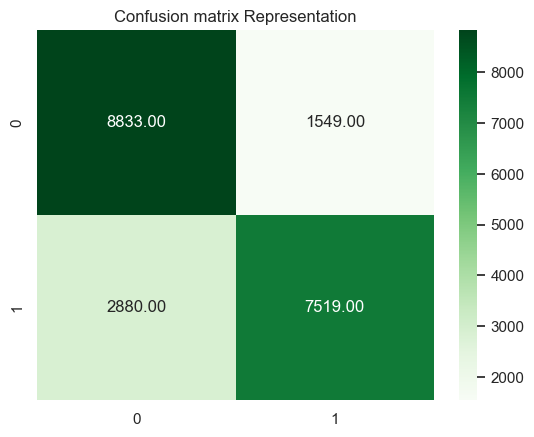

In [323]:
#  Finding the accuracy for the Model.
print("The training accuracy are:- ", accuracy_score(model7.predict(x_train), y_train))
model7_acc = accuracy_score(model7.predict(x_test), y_test)
print("The testing accuracy are:- ", accuracy_score(model7.predict(x_test), y_test))
print("The confusion matrix are:- ", confusion_matrix(model7.predict(x_test), y_test))
print("The Classification report are:- ", classification_report(model7.predict(x_test), y_test))

#  Plot for the confusion matrix.
sns.heatmap(confusion_matrix(model7.predict(x_test), y_test), annot=True, annot_kws={"size": 12}, cmap = "Greens", fmt=".2f", )
plt.title("Confusion matrix Representation")
plt.show()

In [324]:
### XGB Classifier Algorithm.
model8 = XGBClassifier(n_estimators = 150, max_depth = 5, learninf_rate = 0.001)

# parameters = {
model8.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learninf_rate=0.001,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=150,
              n_jobs=None, num_parallel_tree=None, ...)

The training accuracy are:-  0.9725467078907162
The testing accuracy are:-  0.9608777248448102
The confusion matrix are:-  [[11430   530]
 [  283  8538]]
The Classification report are:-                precision    recall  f1-score   support

           0       0.98      0.96      0.97     11960
           1       0.94      0.97      0.95      8821

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



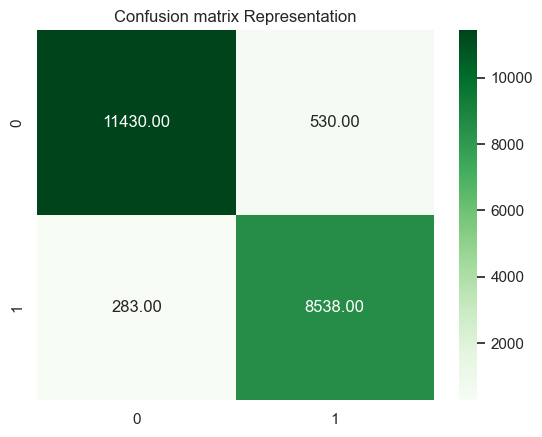

In [330]:
#  Finding the accuracy for the Model.
print("The training accuracy are:- ", accuracy_score(model8.predict(x_train), y_train))
model8_acc = accuracy_score(model8.predict(x_test), y_test)
print("The testing accuracy are:- ", accuracy_score(model8.predict(x_test), y_test))
print("The confusion matrix are:- ", confusion_matrix(model8.predict(x_test), y_test))
print("The Classification report are:- ", classification_report(model8.predict(x_test), y_test))

#  Plot for the confusion matrix.
sns.heatmap(confusion_matrix(model8.predict(x_test), y_test), annot=True, annot_kws={"size": 12}, cmap = "Greens", fmt=".2f", )
plt.title("Confusion matrix Representation")
plt.show()

In [334]:
#  Finding the Best Model and Make Prediction.
models = pd.DataFrame({
    "Model Name": ["Logistic Regression", "KNearest Neighbour", "SVC", "Decision Tree Classifier", "Random Forest Classifier", "Gradient Boost Classifier", 
        "Ada Boost Classifier", "XGB Classifier"],
    "Model Accuracy": [model1_acc * 100, model2_acc * 100, model3_acc * 100, model4_acc * 100, model5_acc * 100, model6_acc * 100, model7_acc * 100, model8_acc * 100]
})
models.sort_values(by = "Model Accuracy", ascending=False)

,Model Name,Model Accuracy
5,Gradient Boost Classifier,96.087772
7,XGB Classifier,96.087772
2,SVC,94.547904
1,KNearest Neighbour,94.129253
4,Random Forest Classifier,92.040807
3,Decision Tree Classifier,90.245898
0,Logistic Regression,87.618498
6,Ada Boost Classifier,78.687262


In [335]:
#  Save the Best Model for the Future Prediction.
import pickle

with open("best_model.pkl", "wb") as mod:
    pickle.dump(model6, mod)